# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [3]:
direct_billrubin = data['Direct_Bilirubin']
total_billrubin = data['Total_Bilirubin']

# Из вектора в столбец numpy
direct_billrubin = np.array(direct_billrubin).reshape(-1,1)
total_billrubin = np.array(total_billrubin).reshape(-1,1)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    direct_billrubin,
    total_billrubin,
    test_size = 0.2,
    random_state = 7
)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Обучаем модель линейной регрессии
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# Оценка модели 
model.score(X_test, Y_test)

0.9894365984154219

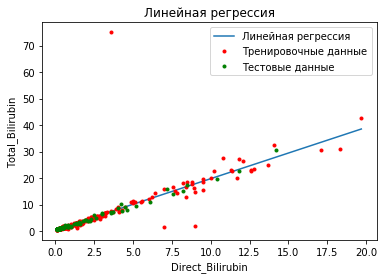

In [7]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')

#predicted_y = model.predict(X_test)

x = np.linspace(min(min(X_train), min(X_test))
                , max(max(X_train), max(X_test)), 100)
y = (model.coef_*x + model.intercept_)

plt.plot(x,y)
#plt.plot(X_test, predicted_y)

plt.plot(X_train, Y_train, 'r.')
plt.plot(X_test, Y_test, 'g.')
plt.legend(['Линейная регрессия',  'Тренировочные данные', 'Тестовые данные'])
plt.show()

Построить одномерную полиномиальную регрессию на Direct_Bilirubin и Total_Bilirubin, используя тренировочные и тестовые данные из шага выше. Проверить точность предсказаний на тестовых данных. Получилось ли улучшить результат?

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Пробуем полином степени 2
poly_reg_2 = PolynomialFeatures(degree=2)

# Преобразуем к квадрату X_train
X_poly_2 = poly_reg_2.fit_transform(X_train)

# Создадим модель линейной регрессии (которую применим к квадрату X)
model_poly_reg = LinearRegression()

# Обучим модель
model_poly_reg.fit(X_poly_2, Y_train)

# Оценка модели: от квадрата X_test, Y_test
model_poly_reg.score(poly_reg_2.fit_transform(X_test), Y_test)

0.9869521444386617

Видно, что оценка уменьшилась

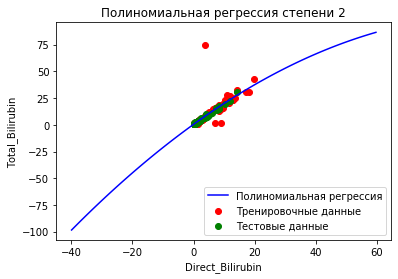

In [9]:
def viz_polymonial(model, polynom_feature):
    plt.scatter(X_train, Y_train, c='red')
    plt.scatter(X_test, Y_test, c='green')
    x = np.linspace(min(min(X_train), min(X_test)) - 40
              , max(max(X_train), max(X_test)) + 40, 100)
    
    y = model.predict(polynom_feature.fit_transform(x))
    
    plt.plot(x, y, 'b')
    plt.title(f'Полиномиальная регрессия степени {polynom_feature.degree}')
    plt.xlabel('Direct_Bilirubin')
    plt.ylabel('Total_Bilirubin')
    plt.legend(['Полиномиальная регрессия', 'Тренировочные данные', 'Тестовые данные'])
    plt.show()
    return
viz_polymonial(model_poly_reg, poly_reg_2)

Оценка модели 3-ой степени:0.9815


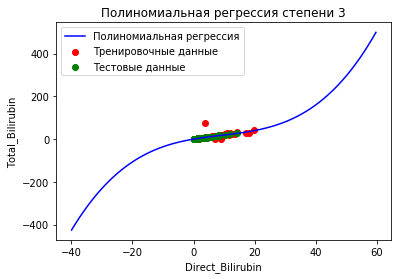

Оценка модели 4-ой степени:0.9814


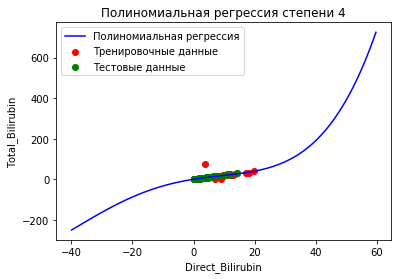

Оценка модели 5-ой степени:0.9813


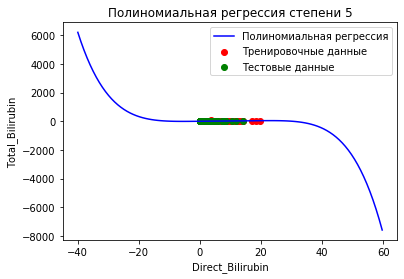

Оценка модели 6-ой степени:0.9695


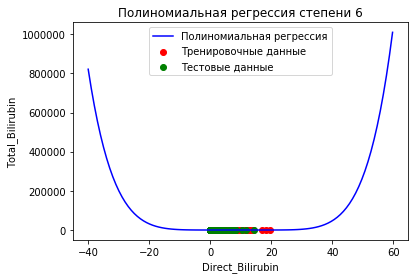

Оценка модели 7-ой степени:0.9674


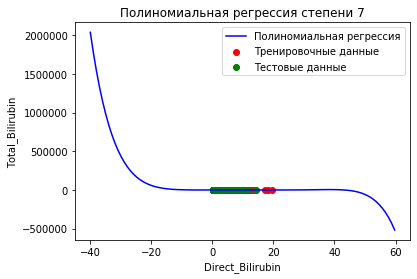

In [10]:
# Пробуем полиномы степени 3+ степени

for i in range(3, 8):
    poly_reg_i = PolynomialFeatures(degree = i)
    
    # Преобразуем X_train к i-ой степени
    X_poly_i = poly_reg_i.fit_transform(X_train)

    # Переобучим модель (от i-степени)
    model_poly_reg.fit(X_poly_i, Y_train)

    # Оценка модели: от куба X_test, Y_test
    print(f'Оценка модели {i}-ой степени:{model_poly_reg.score(poly_reg_i.fit_transform(X_test), Y_test):.4f}')

    # Отрисуем линию полиномиальную регрессию 
    viz_polymonial(model_poly_reg, poly_reg_i)

**ВЫВОД:** <br>
При увеличении степени многочлена полиномиальной регресси результат не улучшился. Модль линейная регрессии (полином первой степени) оптимальна

Построить многомерную **логистическую регрессию** для предсказания болезни (Dataset) от всех параметров, предварительно разделив данные на 80% тренировочных и 20% тестовых. Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.

Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, сделать сравнение двух моделей по этим классификационным отчетам.

In [11]:
import math

# ОЧИЩАЕМ data

data=pd.read_csv(url)

# Добавление элементов в DataFrame через цикл выполняется с помощью списков
empty_lines = []

for i in data.columns:
    # Если в столбце есть пустые элементы
    if len(data[data[i].isna() == True]) > 0:
        # то перезаписываем X
        data = data[data[i].isna() != True]
        # и если нужно, то для каждого элемента записываем в список строк соответствующую строку
        for elem in data[data[i].isna() == True].values.tolist():
            empty_lines.append(elem)
            
data1 = pd.DataFrame(empty_lines,columns=data.columns).drop_duplicates()
# На случай если строка учтена 2 раза
# data1 - набор строк, который исключили

# представим пол кодом:
data.loc[(data['Gender'] == 'Female'), 'Gender_Code'] = 0
data.loc[(data['Gender'] == 'Male'), 'Gender_Code'] = 1
data['Gender_Code']= data['Gender_Code'].astype(int)
data = data.drop('Gender', axis =1 )

# Весь фрейм, кроме колонки Dataset
X = data.drop('Dataset', axis=1)
Y = data['Dataset']

In [12]:
from sklearn.linear_model import LogisticRegression

# разделим на тренировочные данные и на тестовые
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# liblinear - алгоритм подходит для небольших выборок (у нас 579 элементов)
# Создаем модель
logistic_model = LogisticRegression(solver='liblinear')

# Обучаем
logistic_model.fit(X_train, Y_train);

In [13]:
from sklearn.metrics import classification_report

logistic_model_pred = logistic_model.predict(X_test)

# Сравниваем реальные и полученные значения
print(classification_report(Y_test, logistic_model_pred))

              precision    recall  f1-score   support

           1       0.69      0.95      0.80        77
           2       0.60      0.15      0.24        39

    accuracy                           0.68       116
   macro avg       0.64      0.55      0.52       116
weighted avg       0.66      0.68      0.61       116



**Модель нашла только 15 процентов здоровых из всех здоровых в выборке (recall), при это правильность определения здоровых пациентов всего 60 процентов (presicion)**

In [14]:
# Строим матрицу корреляций для отбора только более-менее значимых связей c Y (|r| > 0,2)
corr = data.corr()[['Dataset']]
corr = corr.round(2)
corr

,Dataset
Age,-0.13
Total_Bilirubin,-0.22
Direct_Bilirubin,-0.25
Alkaline_Phosphotase,-0.18
Alamine_Aminotransferase,-0.16
Aspartate_Aminotransferase,-0.15
Total_Protiens,0.03
Albumin,0.16
Albumin_and_Globulin_Ratio,0.16
Dataset,1.00


In [15]:
corr['Dataset_Abs'] = corr['Dataset'].abs()
corr = corr.loc[corr.index.values != 'Dataset']

In [16]:
#corr['Dataset_Abs'] = corr['Dataset'].abs()

# Отбираем значимые колонки ( > 0.15)
corr1 = corr.loc[corr['Dataset_Abs'] > 0.15]
columns_1 = corr1.index.values

X_new_1 = pd.DataFrame(data, columns = columns_1)

# Отбираем самую значимую колонку
corr2 = corr.loc[corr['Dataset_Abs'] == corr['Dataset_Abs'].max()]
column_2 = corr2.index.values

X_new_2 = pd.DataFrame(data, columns = column_2)

In [17]:
# разделим на тренировочные данные и на тестовые
X_train, X_test, Y_train, Y_test = train_test_split(X_new_1, Y, test_size=0.5, random_state=14)

# Обучаем модель
logistic_model.fit(X_train, Y_train)

logistic_model_pred = logistic_model.predict(X_test)

# Сравниваем реальные и полученные значения
print(classification_report(Y_test, logistic_model_pred))

              precision    recall  f1-score   support

           1       0.80      0.79      0.79       214
           2       0.42      0.45      0.44        76

    accuracy                           0.70       290
   macro avg       0.61      0.62      0.61       290
weighted avg       0.70      0.70      0.70       290



**При выборе нескольких колонок ситуция несильно меняется (при разных random_state). Корреляция между переменными слишком слабая**

In [18]:
# разделим на тренировочные данные и на тестовые
X_train, X_test, Y_train, Y_test = train_test_split(X_new_2, Y, test_size=0.2, random_state = 6)

# Обучаем модель
logistic_model.fit(X_train, Y_train);

logistic_model_pred = logistic_model.predict(X_test)

# Сравниваем реальные и полученные значения
print(classification_report(Y_test, logistic_model_pred))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        82
           2       0.00      0.00      0.00        34

    accuracy                           0.71       116
   macro avg       0.35      0.50      0.41       116
weighted avg       0.50      0.71      0.59       116



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Посчитать квартили для всех колонок. 

In [19]:
q = {}
q['q1_25%'] = {}
q['q2_med'] = {}
q['q3_75%'] = {}

for i in data.columns:
    q['q1_25%'][i] = data[i].quantile(0.25)
    q['q2_med'][i] = data[i].median()
    q['q3_75%'][i] = data[i].quantile(0.75)
    
pd.DataFrame(q)

,q1_25%,q2_med,q3_75%
Age,33.0,45.00,58.0
Alamine_Aminotransferase,23.0,35.00,61.0
Albumin,2.6,3.10,3.8
Albumin_and_Globulin_Ratio,0.7,0.93,1.1
Alkaline_Phosphotase,175.5,208.00,298.0
Aspartate_Aminotransferase,25.0,42.00,87.0
Dataset,1.0,1.00,2.0
Direct_Bilirubin,0.2,0.30,1.3
Gender_Code,1.0,1.00,1.0
Total_Bilirubin,0.8,1.00,2.6


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

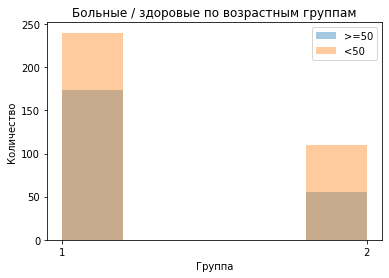

In [20]:
all_people = data['Dataset']

# Выборка больных / здоровых старше 50 лет
old = data[data['Age'] >= 50 ]['Dataset']
young = data[data['Age'] < 50 ]['Dataset']

plt.title("Больные / здоровые по возрастным группам")
sns.distplot(old, bins = 5, kde = False)
sns.distplot(young, bins = 5, kde = False)

plt.xlabel('Группа')
plt.ylabel('Количество')

plt.xticks([1,2])

plt.legend(['>=50', '<50'])
plt.show()

In [21]:
print(f'Медиана для выборки людей старше 50 по группам здоровья: {old.quantile(0.5):.2f}')
print(f'Среднее значение для выборки людей старше 50 по группам здоровья: {old.mean():.2f}')
print(f'Медиана для выборки людей младше 50 по группам здоровья: {young.quantile(0.5):.2f}')
print(f'Среднее значение для выборки людей младше 50 по группам здоровья: {young.mean():.2f}')


Медиана для выборки людей старше 50 по группам здоровья: 1.00
Среднее значение для выборки людей старше 50 по группам здоровья: 1.24
Медиана для выборки людей младше 50 по группам здоровья: 1.00
Среднее значение для выборки людей младше 50 по группам здоровья: 1.31


**Медианы = 1, значит больных в обеих группах больше чем здоровых. При этом пропорция больные/здоровые хуже среди более пожилых людей (т.к среднее меньше)**


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [22]:
ill_bilirubin = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(ill_bilirubin, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.4588588880494733, pvalue=0.014347239706774866)

**P уровень значимости меньше 0,05, поэтому вероятность ошибки первого рода (принять гипотезу H1, когда верна гипотеза H0 минимальна). Отклоняем нулевую гипотезу (выборка и генеральная совокупность имеют одинаковое мат. ожидание) и принимаем H1: мат. ожидания выборки и генеральной совокупности не совпадают**

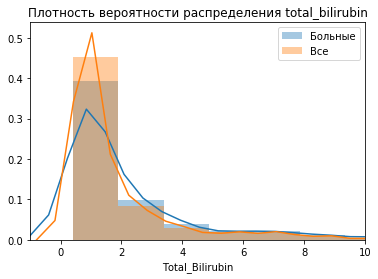

In [23]:
total_bilirubin = data['Total_Bilirubin']
sns.distplot(ill_bilirubin)
sns.distplot(total_bilirubin)
plt.title('Плотность вероятности распределения total_bilirubin')
plt.legend(['Больные', 'Все'])
plt.xlim(-1, 10)
plt.show()

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [24]:
healthy_bilirubin = data[data['Dataset']==2]['Total_Bilirubin']
stats.ttest_ind(healthy_bilirubin, ill_bilirubin)

Ttest_indResult(statistic=-5.422946004172417, pvalue=8.632557516910643e-08)

**P уровень значимости меньше 0,05. Отклоняем нулевую гипотезу (H0 - средние двух выборок равны). Средние двух выборок не совпадают**

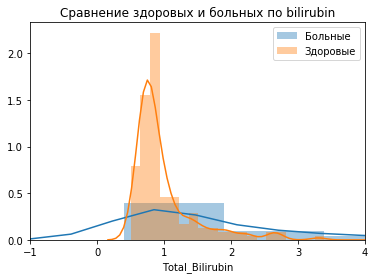

In [25]:
sns.distplot(ill_bilirubin)
sns.distplot(healthy_bilirubin)
plt.title('Сравнение здоровых и больных по bilirubin')
plt.legend(['Больные', 'Здоровые'])
plt.xlim(-1, 4)
plt.show()

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [26]:
one_thirty = data[data['Age'] < 31]['Dataset']
thirty_fifty = data[(data['Age'] > 30) & (data['Age'] < 51)]['Dataset']
fifty_plus = data[data['Age'] > 50]['Dataset']

stats.f_oneway(one_thirty, thirty_fifty, fifty_plus)

F_onewayResult(statistic=8.501983516532599, pvalue=0.00022966076376701534)

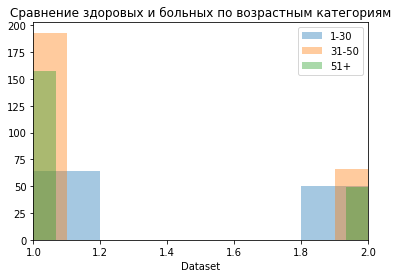

In [27]:
sns.distplot(one_thirty, kde = False, bins = 5)
sns.distplot(thirty_fifty, kde = False, bins = 10)
sns.distplot(fifty_plus, kde = False, bins = 15)
plt.title('Сравнение здоровых и больных по возрастным категориям')
plt.legend(['1-30', '31-50' , '51+'])
plt.xlim(1, 2)
plt.show()

Вопросы задавать на почту yustiks@gmail.com